In [1]:
from core.activations import Fun
from core.losses import LossFun
from core.mlp import MLP

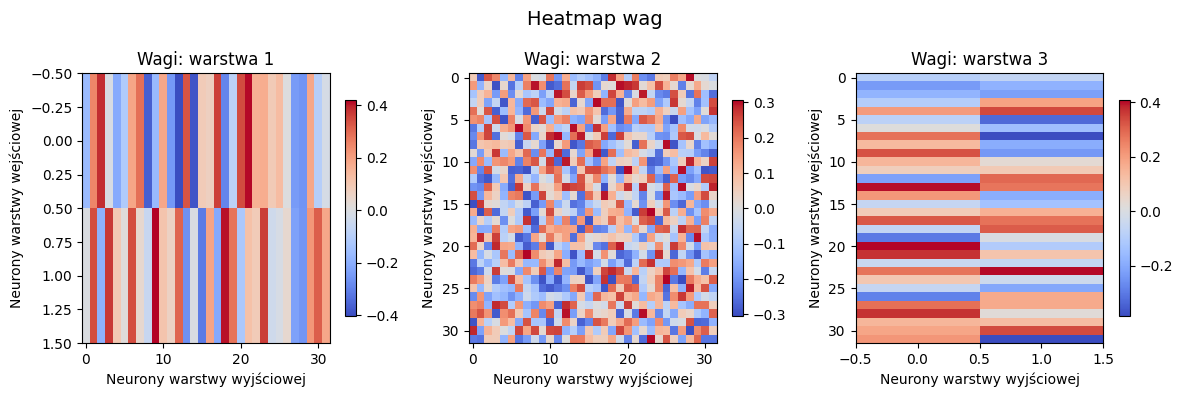

Epoka 500/5000, błąd: 0.116014
Epoka 1000/5000, błąd: 0.081950
Epoka 1500/5000, błąd: 0.075441
Epoka 2000/5000, błąd: 0.071468
Epoka 2500/5000, błąd: 0.068454
Epoka 3000/5000, błąd: 0.066005
Epoka 3500/5000, błąd: 0.063843
Epoka 4000/5000, błąd: 0.061906
Epoka 4500/5000, błąd: 0.060032
Epoka 5000/5000, błąd: 0.058280


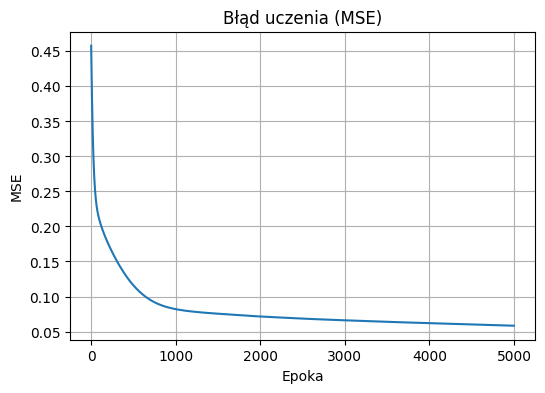

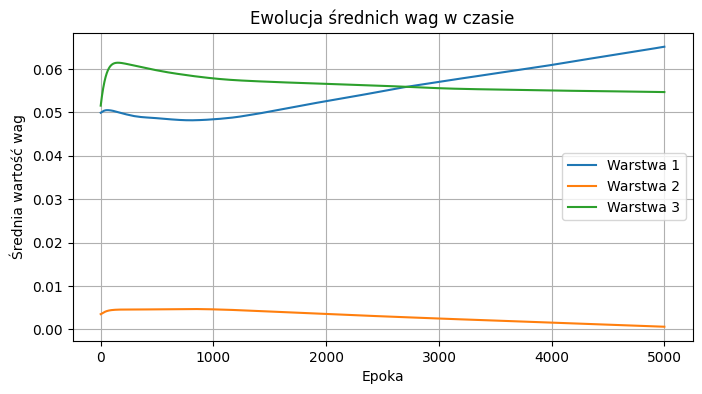

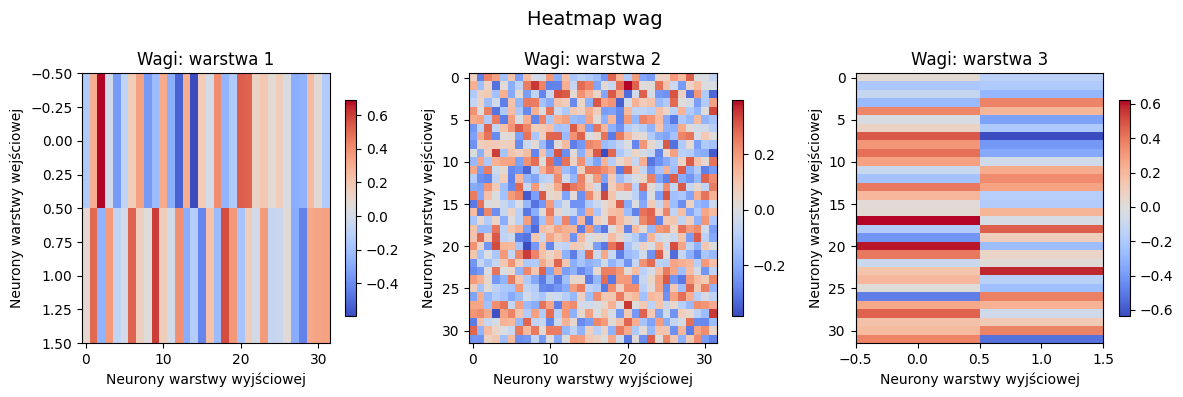

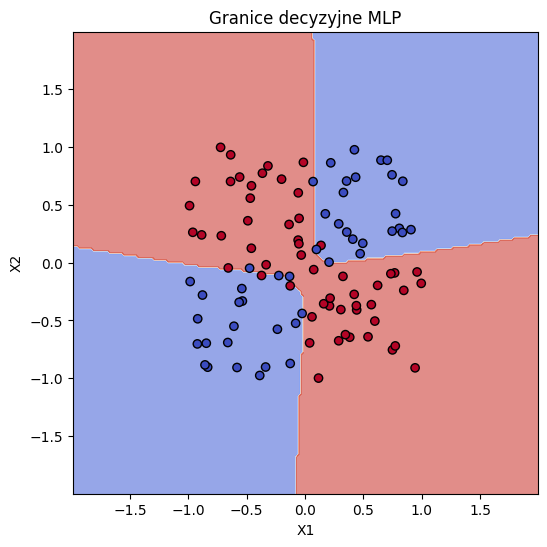

In [3]:
from plots.loss import make_loss_plot
from plots.classification.boundary import plot_decision_boundary
from data.classification import get_classification_data, Size, ClassificationType
from plots.weights import make_weights_avg_plot, make_weights_heatmap


X, y = get_classification_data(
    class_type=ClassificationType.NOISY_XOR, class_size=Size._100
)

layer_sizes = [2, 32, 32, y.shape[1]]
activations = [Fun.ReLU, Fun.ReLU, Fun.Linear]
mlp = MLP(layer_sizes, activations, loss_fun=LossFun.MSE)

make_weights_heatmap(mlp)
weights_before = mlp.layers[0].W.copy()

epochs = 5000
learning_rate = 0.01
error_history, weight_history = mlp.train(X, y, epochs, learning_rate)

weights_after = mlp.layers[0].W.copy()

make_loss_plot(error_history)
make_weights_avg_plot(weight_history)
make_weights_heatmap(mlp)

plot_decision_boundary(mlp, X, y)

Epoka 500/5000, błąd: 0.289384
Epoka 1000/5000, błąd: 0.284528
Epoka 1500/5000, błąd: 0.274384
Epoka 2000/5000, błąd: 0.264129
Epoka 2500/5000, błąd: 0.237175
Epoka 3000/5000, błąd: 0.158082
Epoka 3500/5000, błąd: 0.108043
Epoka 4000/5000, błąd: 0.079992
Epoka 4500/5000, błąd: 0.039093
Epoka 5000/5000, błąd: 0.018498


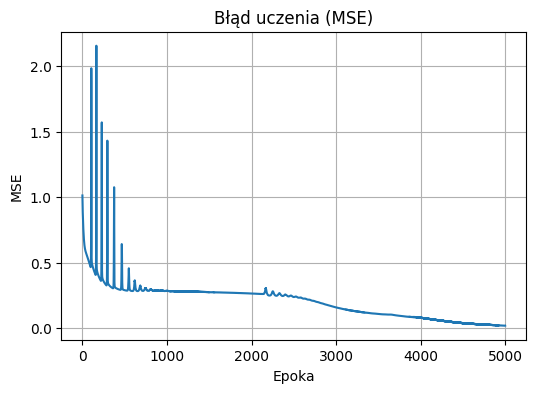

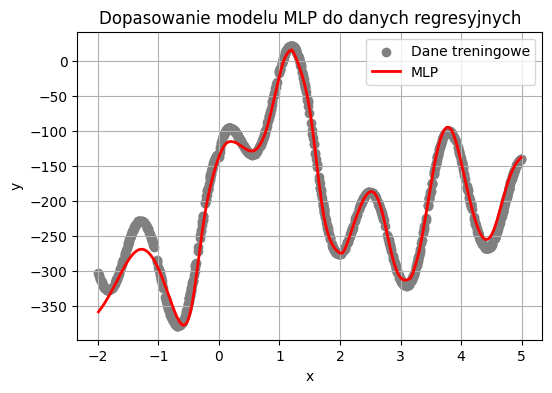

In [8]:
from data.regression import get_regression_data, Size, RegressionType
from utils.normalize import normalize
from plots.loss import make_loss_plot
from plots.regression.fit import make_fit_plot

X, Y = get_regression_data(class_type=RegressionType.MULTIMODAL, class_size=Size._1000)

Xn, X_mean, X_std = normalize(X)
Yn, Y_mean, Y_std = normalize(Y)

layer_sizes = [1, 64, 64, 32, 1]
activations = [Fun.ReLU, Fun.Tanh, Fun.Tanh, Fun.Linear]
mlp = MLP(layer_sizes, activations, loss_fun=LossFun.MSE)

epochs = 5000
learning_rate = 0.1
error_history, weight_history = mlp.train(Xn, Yn, epochs, learning_rate)

make_loss_plot(error_history)
# make_weights_plot(weight_history)

make_fit_plot(X, Y, mlp)